### Objective

- Learn how to implement hierarchical clustering on a real-world dataset (Socio-economic data by country)
- Use hierarchical clustering to cluster/segment data
- Visualize the clusters

In [1]:
# Importing important libraries
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Importing data and transforming using PCA
country_data = pd.read_csv("https://raw.githubusercontent.com/curlsloth/IK_teaching/main/Country_socioeconomic-data.csv")

# checking for outliers using the Z-score

from scipy import stats

z = np.abs(stats.zscore(country_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outlier points along with the respective column numbers in the second array')
print("\n")
print(np.where(z > 3))


# Removing the outliers

country_data_outliers_removed = country_data[(z<3).all(axis=1)]


X = country_data_outliers_removed.drop('country',axis =1)
y = country_data_outliers_removed['country']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

pca_final = PCA(n_components=4)
X_pca_final = pca_final.fit_transform(X_scaled)

     child_mort   exports    health   imports    income  inflation  \
0      1.291532  1.138280  0.279088  0.082455  0.808245   0.157336   
1      0.538949  0.479658  0.097016  0.070837  0.375369   0.312347   
2      0.272833  0.099122  0.966073  0.641762  0.220844   0.789274   
3      2.007808  0.775381  1.448071  0.165315  0.585043   1.387054   
4      0.695634  0.160668  0.286894  0.497568  0.101732   0.601749   
..          ...       ...       ...       ...       ...        ...   
162    0.225578  0.200917  0.571711  0.240700  0.738527   0.489784   
163    0.526514  0.461363  0.695862  1.213499  0.033542   3.616865   
164    0.372315  1.130305  0.008877  1.380030  0.658404   0.409732   
165    0.448417  0.406478  0.597272  0.517472  0.658924   1.500916   
166    1.114951  0.150348  0.338015  0.662477  0.721358   0.590015   

     life_expec  total_fer      gdpp  
0      1.619092   1.902882  0.679180  
1      0.647866   0.859973  0.485623  
2      0.670423   0.038404  0.465376  
3  

In [3]:
X_scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874
...,...,...,...,...,...,...,...,...,...
148,-0.025502,-0.343612,-0.381062,-0.903307,-0.757746,1.368064,-0.202080,-0.418486,-0.662557
149,-0.221423,0.390877,-0.602264,0.364991,-0.854287,-0.635844,-0.909199,0.369138,-0.548167
150,-0.384230,1.642960,0.025791,1.806239,-0.739037,0.732820,0.322164,-0.683290,-0.667593
151,0.526386,-0.427413,-0.629915,-0.594094,-0.739785,2.393118,-0.360572,1.163551,-0.667593


## Hierarchical Clustering

In [4]:
# Import libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score

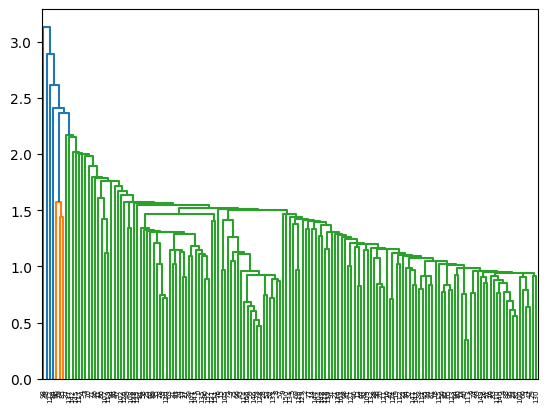

In [5]:
# single linkage
sl_mergings = linkage(X_scaled_df, method="single", metric='euclidean')
dendrogram(sl_mergings)
plt.show()

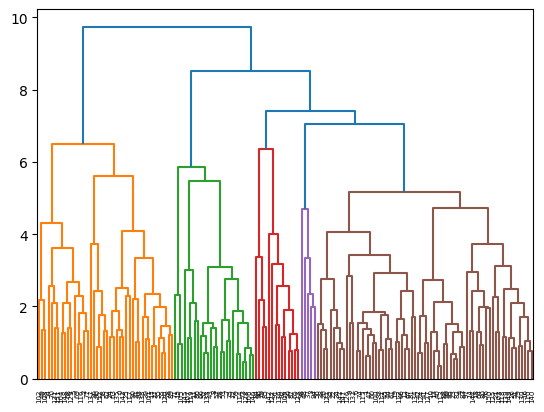

In [6]:
# complete linkage
cl_mergings = linkage(X_scaled_df, method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.show()

(array([150.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

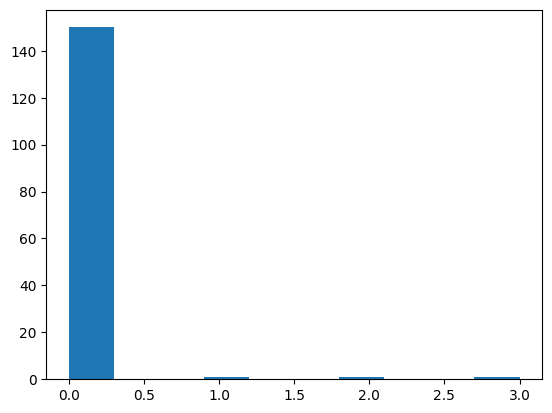

In [8]:
# 4 clusters using single linkge
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=4).reshape(-1, )
sl_cluster_labels
plt.hist(sl_cluster_labels)

##### the single linkage clustering does not perform well in generating the clusters hence we go for complete linkage

(array([42.,  0.,  0., 72.,  0.,  0., 25.,  0.,  0., 14.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

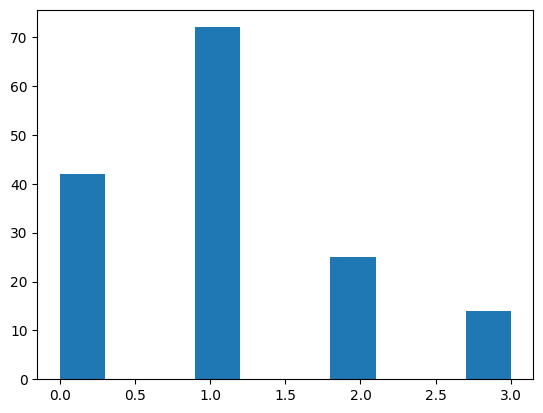

In [10]:
# 4 clusters using complete linkage
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=4).reshape(-1, )
cl_cluster_labels
plt.hist(cl_cluster_labels)

In [11]:
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4'])
X_pca_final_df['Hierarchical_Cluster_Labels'] = cl_cluster_labels

In [12]:
X_pca_final_df

,PC1,PC2,PC3,PC4,Hierarchical_Cluster_Labels
0,-3.130806,-0.471117,1.336274,0.641322,0
1,0.551781,-0.230632,-0.071234,-1.377036,1
2,-0.356257,-0.542354,-1.818159,-0.216783,0
3,-3.454323,1.114470,-1.553986,2.168457,1
4,1.308957,0.612033,-0.065287,-0.687559,1
...,...,...,...,...,...
148,-1.018529,-0.731559,-1.161339,-0.476265,0
149,-0.891335,0.907202,0.189163,-0.635586,1
150,0.331876,2.386196,-0.572829,-0.650777,1
151,-2.233628,-0.522003,-1.400054,0.649399,0


<Axes: xlabel='PC1', ylabel='PC2'>

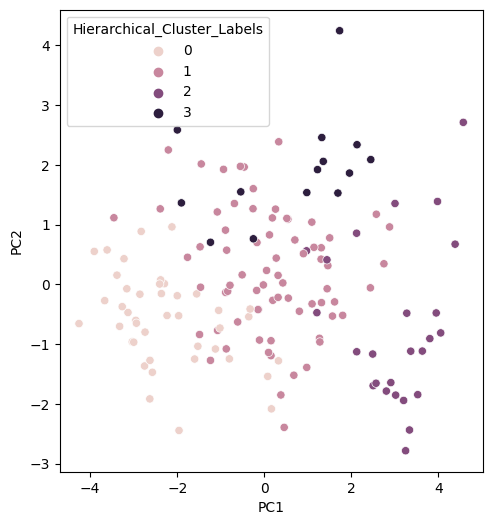

In [13]:
plt.figure(figsize=(12,6),dpi=100)


plt.subplot(1,2,2)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='Hierarchical_Cluster_Labels')